# Imports

In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns

# Loading the Iris dataset and converting it to a Pandas dataframe for future analysis

In [2]:
from sklearn.datasets import load_iris

data = load_iris()
df = pd.DataFrame(data= np.c_[data['data'], data['target']],
                     columns= data['feature_names'] + ['target'])



# Getting information about the data and separating labels

In [3]:
# Checking which classes to predict
# 0: setosa, 1: versicolor, 2: virginica
print("Classes: ", data.target_names)

X = data.data
y = data.target

# Displaying data (first 5 data points)
print(df.head())

# Checking columns, number of samples, and printing first few rows
print(df.columns)
print("Number of samples: ", X.shape[0])
print(X[:4])

# Checking variance
print(df.var())

Classes:  ['setosa' 'versicolor' 'virginica']
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  
Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')
Number of samples:  150
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]]
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
target               0.671141
dtype: float64


In [4]:
# Getting correlations between all of the columns
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


<AxesSubplot:>

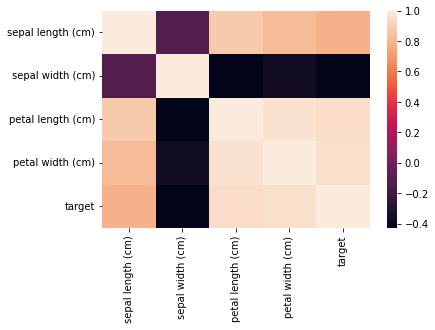

In [5]:
# Heatmap of correlations
sns.heatmap(df.corr())

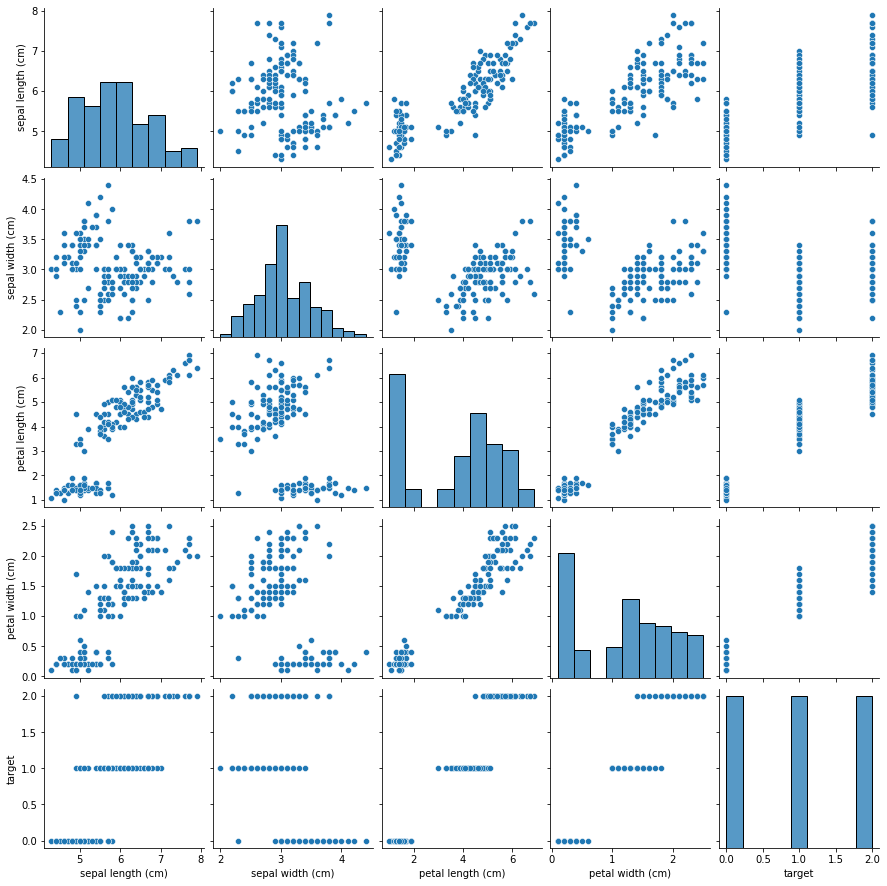

In [6]:
# Getting histograms and correlation scatter plots to see relationships
sns.pairplot(df)

# Train test split and training the decision tree classifier

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 47, test_size = 0.25)

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion = 'entropy')
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

# Making predictions on the test set and getting an accuracy

In [17]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
print('Accuracy on train set (DT): ', accuracy_score(y_true=y_train, y_pred=clf.predict(X_train)))
print('Accuracy on test set (DT): ', accuracy_score(y_true=y_test, y_pred=y_pred))
print(("The Confusion Matrix is :\n" ))
print(confusion_matrix(y_test,y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.89      1.00      0.94         8
           2       1.00      0.93      0.97        15

    accuracy                           0.97        38
   macro avg       0.96      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

Accuracy on train set (DT):  1.0
Accuracy on test set (DT):  0.9736842105263158
The Confusion Matrix is :

[[15  0  0]
 [ 0  8  0]
 [ 0  1 14]]


# Defining, training, and testing random forest classifier

In [20]:
from sklearn.ensemble import RandomForestClassifier

clf2 = RandomForestClassifier(n_estimators=100)
clf2.fit(X_train,y_train)
y_pred2 = clf2.predict(X_test)

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test, y_pred2))
print('Accuracy on train set (RF): ', accuracy_score(y_true=y_train, y_pred=clf2.predict(X_train)))
print('Accuracy on test set (RF): ', accuracy_score(y_true=y_test, y_pred=y_pred))
print("The confusion Matrix :")
print(confusion_matrix(y_test, y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.89      1.00      0.94         8
           2       1.00      0.93      0.97        15

    accuracy                           0.97        38
   macro avg       0.96      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

Accuracy on train set (RF):  1.0
Accuracy on test set (RF):  0.9736842105263158
The confusion Matrix :
[[15  0  0]
 [ 0  8  0]
 [ 0  1 14]]


# Visualizing the decision tree

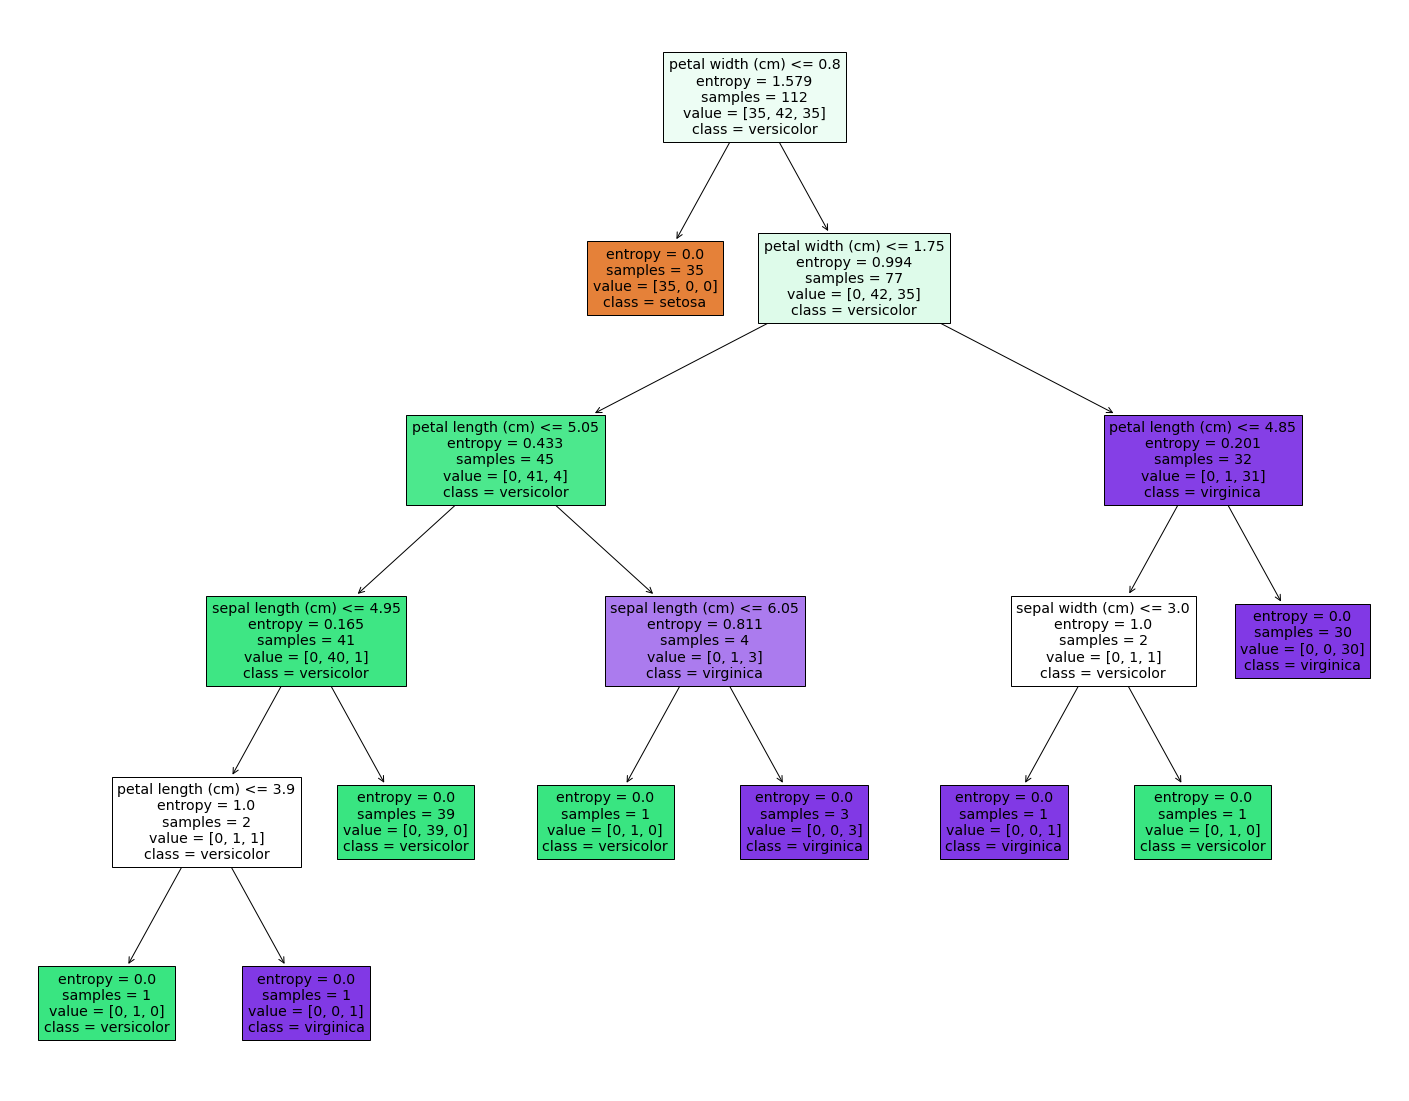

In [21]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=data.feature_names,  
                   class_names=data.target_names,
                   filled=True)